In [107]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [108]:
endpoint = "https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$select=month_name,month,year,query_count,query_text"

response = requests.get(endpoint)

In [109]:
response

<Response [200]>

In [110]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

August had the most searches for "fire" with 47

2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [135]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&$select=month_name,month,year,query_count,query_text&$group=month_name,month,year,query_count,query_text&$limit=50000'

response = requests.get(endpoint)

In [136]:
response

<Response [200]>

In [137]:
res = response.json()
res

[{'month_name': 'January',
  'month': '1',
  'year': '2020',
  'query_count': '103',
  'query_text': 'Permits'},
 {'month_name': 'August',
  'month': '8',
  'year': '2020',
  'query_count': '152',
  'query_text': 'recycle'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '124',
  'query_text': 'human resources'},
 {'month_name': 'April',
  'year': '2017',
  'query_count': '110',
  'query_text': 'short term rental'},
 {'month_name': 'July',
  'year': '2015',
  'query_count': '107',
  'query_text': 'human resources'},
 {'month_name': 'November',
  'month': '11',
  'year': '2019',
  'query_count': '122',
  'query_text': 'holidays'},
 {'month_name': 'July',
  'year': '2015',
  'query_count': '116',
  'query_text': 'animal control'},
 {'month_name': 'August',
  'month': '8',
  'year': '2019',
  'query_count': '193',
  'query_text': 'HUMAN RESOURCES'},
 {'month_name': 'August',
  'year': '2018',
  'query_count': '135',
  'query_text': 'pay plan'},
 {'month_name': 'December',
 

In [138]:
len(res)

1262

With len, it says it happened 1262 times.

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [115]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&query_text=codes&$select=month_name,month,year,query_count,query_text&$group=month_name,month,year,query_count,query_text'

response = requests.get(endpoint)

In [116]:
response

<Response [200]>

In [117]:
res = response.json()
res

[{'month_name': 'April',
  'month': '4',
  'year': '2019',
  'query_count': '168',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2017',
  'query_count': '190',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2018',
  'query_count': '170',
  'query_text': 'codes'},
 {'month_name': 'August',
  'month': '8',
  'year': '2019',
  'query_count': '156',
  'query_text': 'codes'},
 {'month_name': 'August',
  'month': '8',
  'year': '2020',
  'query_count': '178',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2015',
  'query_count': '117',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2017',
  'query_count': '222',
  'query_text': 'codes'},
 

In [118]:
len(res)

56

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [119]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_text="maps"&$select=month_name,sum(query_count)&$group=month_name'
response = requests.get(endpoint)

In [120]:
response

<Response [200]>

In [121]:
res = response.json()
res

[{'month_name': 'April', 'sum_query_count': '1309'},
 {'month_name': 'August', 'sum_query_count': '991'},
 {'month_name': 'December', 'sum_query_count': '556'},
 {'month_name': 'February', 'sum_query_count': '832'},
 {'month_name': 'January', 'sum_query_count': '924'},
 {'month_name': 'July', 'sum_query_count': '1062'},
 {'month_name': 'June', 'sum_query_count': '1216'},
 {'month_name': 'March', 'sum_query_count': '1090'},
 {'month_name': 'May', 'sum_query_count': '1019'},
 {'month_name': 'November', 'sum_query_count': '805'},
 {'month_name': 'October', 'sum_query_count': '981'},
 {'month_name': 'September', 'sum_query_count': '951'}]

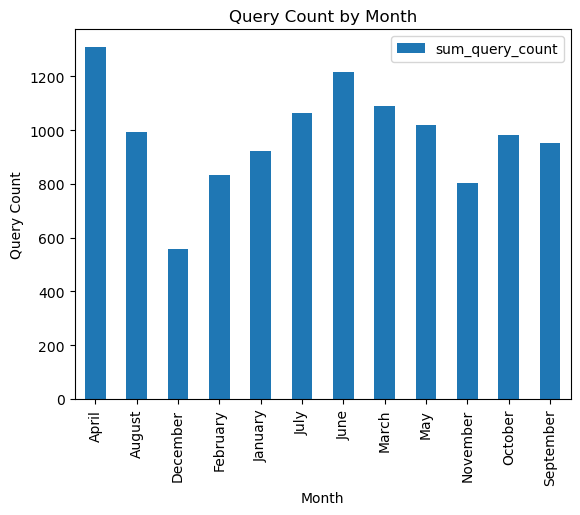

In [122]:
query = pd.DataFrame(res)

query['sum_query_count'] = pd.to_numeric(query['sum_query_count'])

query.plot(kind='bar', x='month_name', y='sum_query_count')
plt.title('Query Count by Month')
plt.xlabel('Month')
plt.ylabel('Query Count')
plt.show()

April had the highest month.

5. Make an API request to pull back all the data from hubNashville (311) Service Requests (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)

In [124]:
endpoint = 'https://data.nashville.gov/resource/7qhx-rexh.json?$select=*'

response = requests.get(endpoint)


In [125]:
response

<Response [200]>

In [126]:
res = response.json()
res

[{'case_number': '966190',
  'status': 'Closed',
  'case_request': 'Resolved by hubNashville on First Call',
  'case_subrequest': 'Resolved by hubNashville on First Call',
  'additional_subrequest': 'Resolved by hubNashville on First Call',
  'date_time_opened': '2022-05-04T17:54:30.000',
  'date_time_closed': '2022-05-04T17:54:30.000',
  'case_origin': 'Phone',
  'state_issue': 'False',
  'closed_when_created': 'True',
  'incident_address': '1301 Pilgrim Dr',
  'incident_city': 'MADISON',
  'incident_council_district': '8',
  'incident_zip_code': '37115',
  'latitude': '36.2718801',
  'longitude': '-86.7175492',
  'mapped_location': {'latitude': '36.2718801', 'longitude': '-86.7175492'},
  ':@computed_region_wvby_4s8j': '1',
  ':@computed_region_3aw5_2wv7': '1',
  ':@computed_region_p6sk_2acq': '3',
  ':@computed_region_gxvr_9jxz': '12',
  ':@computed_region_yf9r_ed6g': '3',
  ':@computed_region_fvtq_wnma': '26',
  ':@computed_region_s8bq_67w7': '3',
  ':@computed_region_v67z_xm3t': '

In [127]:
len(res)

1000

You can only pull a maximum of 1000 rows at a time from hubNashville 311.  You would need to run a loop to pull all data. 

In [128]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$select=*'
response = requests.get(endpoint)

In [129]:
response

<Response [200]>

In [130]:
res = response.json()
len(res)

1000

It appears that both only let you pull a maximum of 1000 entries at one time. You would need to run a loop to continue pulling data.